In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
%matplotlib inline

In [2]:
data = pd.read_csv('Claims1.csv')
data.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,Month,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,5,1,21,0,1,12,300,1,1994,11,...,0,2,3,1,0,1,0,1,2,2
1,3,4,34,0,2,15,400,4,1994,0,...,0,5,4,0,0,1,0,0,0,1
2,5,2,47,0,3,7,400,3,1994,9,...,1,6,6,1,0,1,0,0,0,1
3,2,1,65,0,4,4,400,2,1994,6,...,1,7,7,0,0,1,3,0,0,2
4,5,2,27,0,5,3,400,1,1994,0,...,0,4,4,1,0,1,0,0,0,1


In [3]:
X = data.ix[:, data.columns != 'FraudFound_P']
yy = data.ix[:, data.columns == 'FraudFound_P']
y = np.asarray(yy['FraudFound_P'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


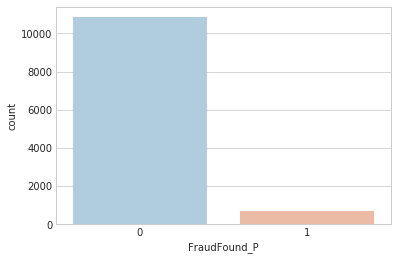

In [4]:
p = np.c_[X_train,y_train]
d = pd.DataFrame(p, columns = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year',
       'Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy', 'FraudFound_P'])
sns.set_style('whitegrid')
sns.countplot(x = 'FraudFound_P', data = d, palette = 'RdBu_r')

# ADASYN

In [5]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42,ratio='minority')
X_res, y_res = ada.fit_sample(X_train, y_train)

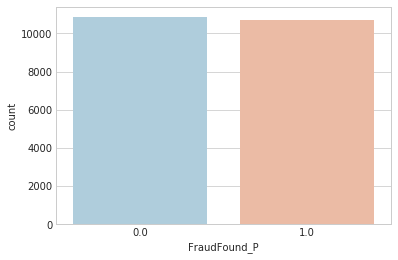

In [6]:
p = np.c_[X_res,y_res]
d = pd.DataFrame(p, columns = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year',
       'Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy', 'FraudFound_P'])
sns.set_style('whitegrid')
sns.countplot(x = 'FraudFound_P', data = d, palette = 'RdBu_r')

# Random Forest with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [50, 100, 500, 1000, 2000, 2500, 3000],'max_depth':[1,2,3,5,7,9], 'min_samples_leaf':[5,10,15]}
rf = RandomForestClassifier()
grid = GridSearchCV(rf,param_grid,refit=True,verbose=2)
grid.fit(X_res,y_res)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
from sklearn.metrics import accuracy_score
print( accuracy_score(y_test, grid_predictions))

# Gradient Boosting Method with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbm_params2 = {'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators':[50,100,500,1000,1500], 'min_samples_leaf':[5,10,15]}
rf = GradientBoostingClassifier()
grid = GridSearchCV(rf,param_grid,refit=True,verbose=2)
grid.fit(X_res,y_res)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

print(classification_report(y_test,grid_predictions))
from sklearn.metrics import accuracy_score
print( accuracy_score(y_test, grid_predictions) )